### Student Performance Indicator
#### Life cycle of Machine learning Project:
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Conclusions from EDA
6. Data Pre-Processing
7. Model Training
8. Choose best model

### 1. Problem statement:
This project understands how our target variable (math score) is affected by other variables such as Gender, Ethnicity, 
Parental level of education, Lunch and Test preparation course.

### 2. Data Collection:
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977.
The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the csv file as a Dataframe

In [7]:
df= pd.read_csv('StudentsPerformance.csv')

Display first 5 rows

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [11]:
df.shape

(1000, 8)

#### 2.2 Dataset information:

    a) gender : sex of students -> (Male/female)

    b) race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

    c) parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)

    d) lunch : having lunch before test (standard or free/reduced)
    
    e) test preparation course : complete or not complete before test
    
    f) math score
    
    g) reading score
    
    h) writing score

### 3. Data Checks to perform:

    3.1. Check Missing values
    
    3.2. Check Duplicates
    
    3.3. Check data type
    
    3.4. Check the number of unique values of each column
    
    3.5. Check statistics of data set
    
    3.6. Check various categories present in the different categorical column

    3.7 Feature Engineering 

#### 3.1 Check Missing Values

In [15]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset.

#### 3.2 Check Duplicates

In [18]:
df.duplicated().sum()

0

There are no duplicated values in the dataset

#### 3.3 Check Datatype

In [21]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### 3.4 Check the number of unique values of each column

In [23]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [25]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight:

-> We observe that mean of each numerical column is between 66 and 68.05

-> Standard deviation of each column is also around the same.

-> We observe that the minimum value of math score is 0. But for reading score and writing score it is 17 and 10 respectively

#### 3.6 Check various categories present in the different categorical column

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [30]:
# define numerical & categorical columns
numeric_features= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features= [feature for feature in df.columns if df[feature].dtype =='O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.7 Feature Engineering

In [32]:
# Adding columns for "Total Score" and "Average"
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [34]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights:
From above values we get students have performed the worst in Maths

Best performance is in reading section

### Exploratory data analysis
#### 4.1 Visualize average score distribution to make some conclusion.

Histogam and 
Kernel Distribution Function (KDE)

##### 4.1.1 Histogram & KDE

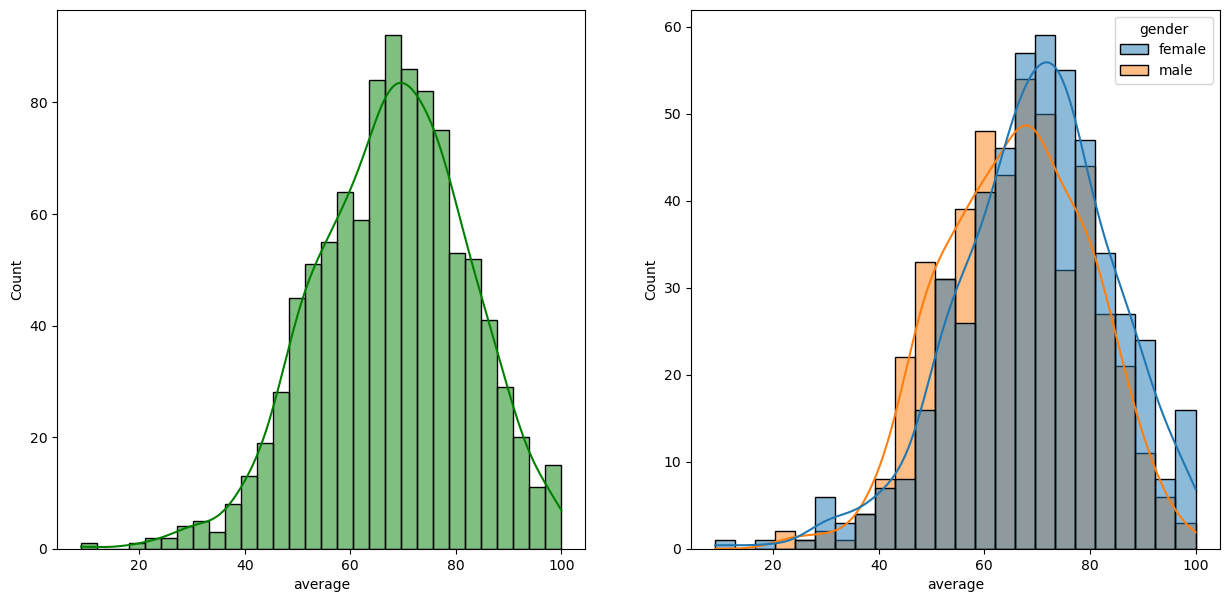

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

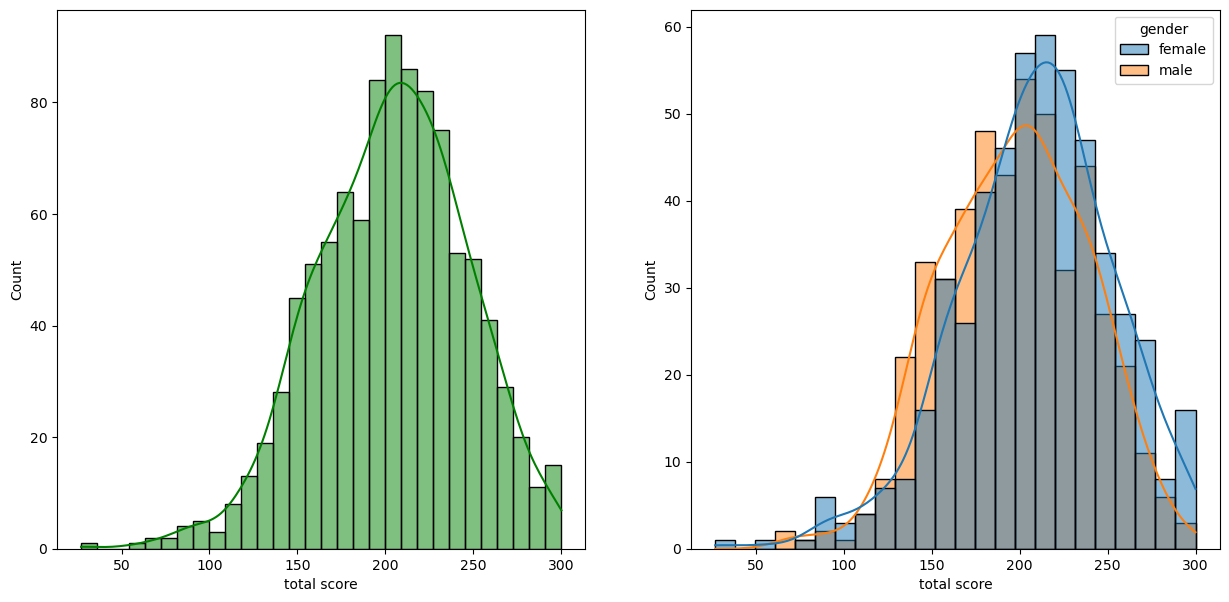

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#### Insights
Female students tend to perform well then male students.

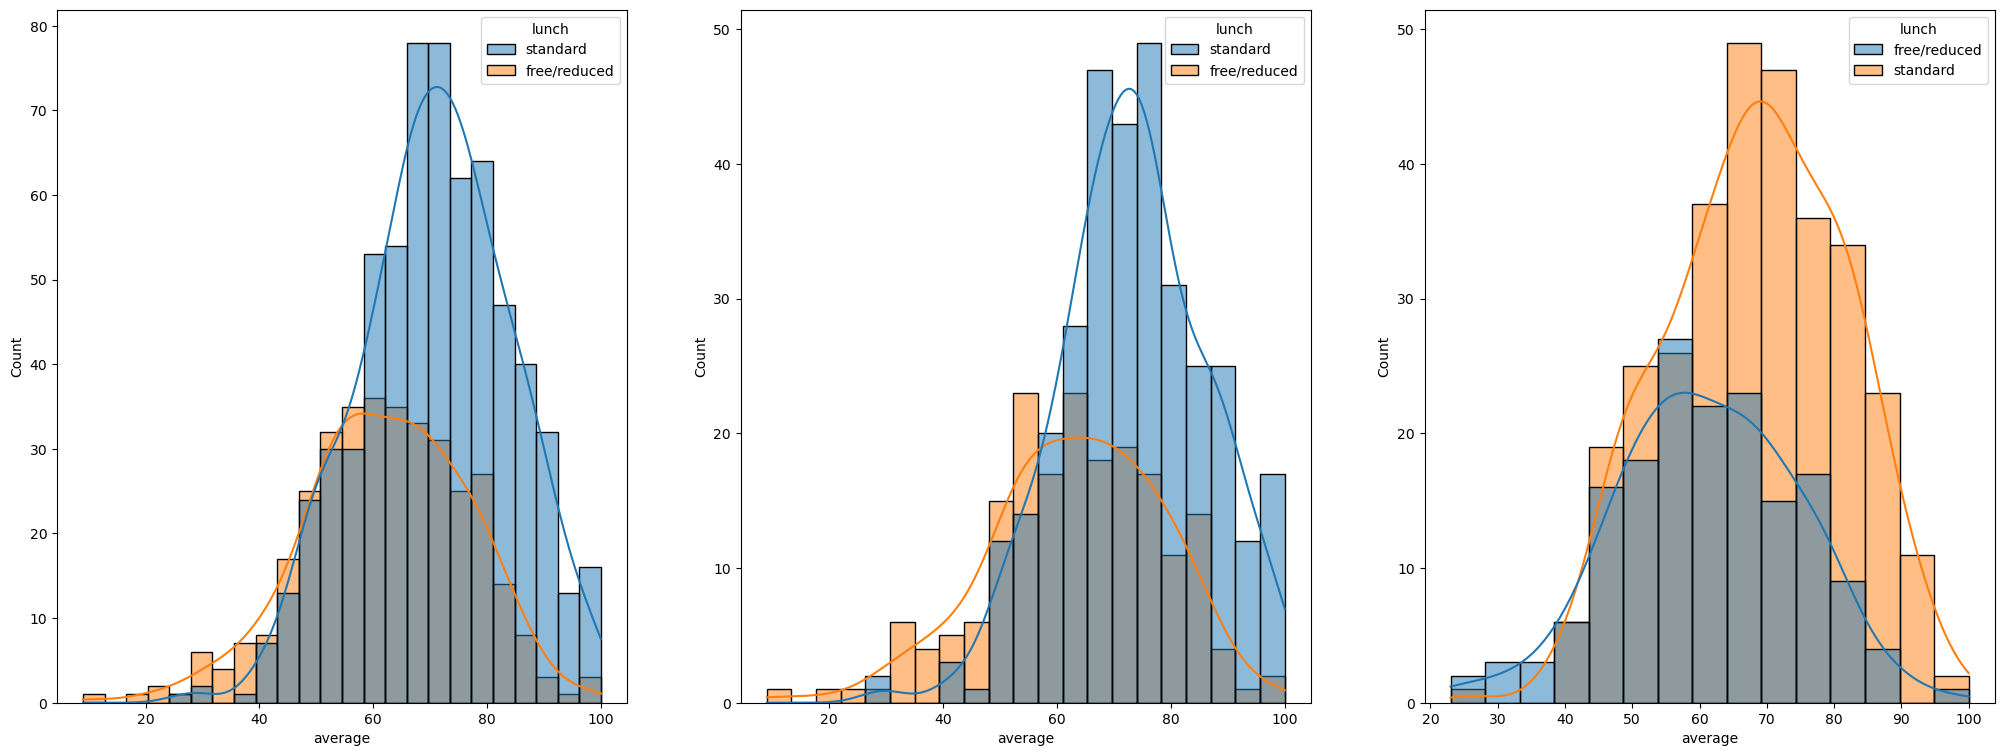

In [41]:
plt.subplots(1,3,figsize=(25,9))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights

Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

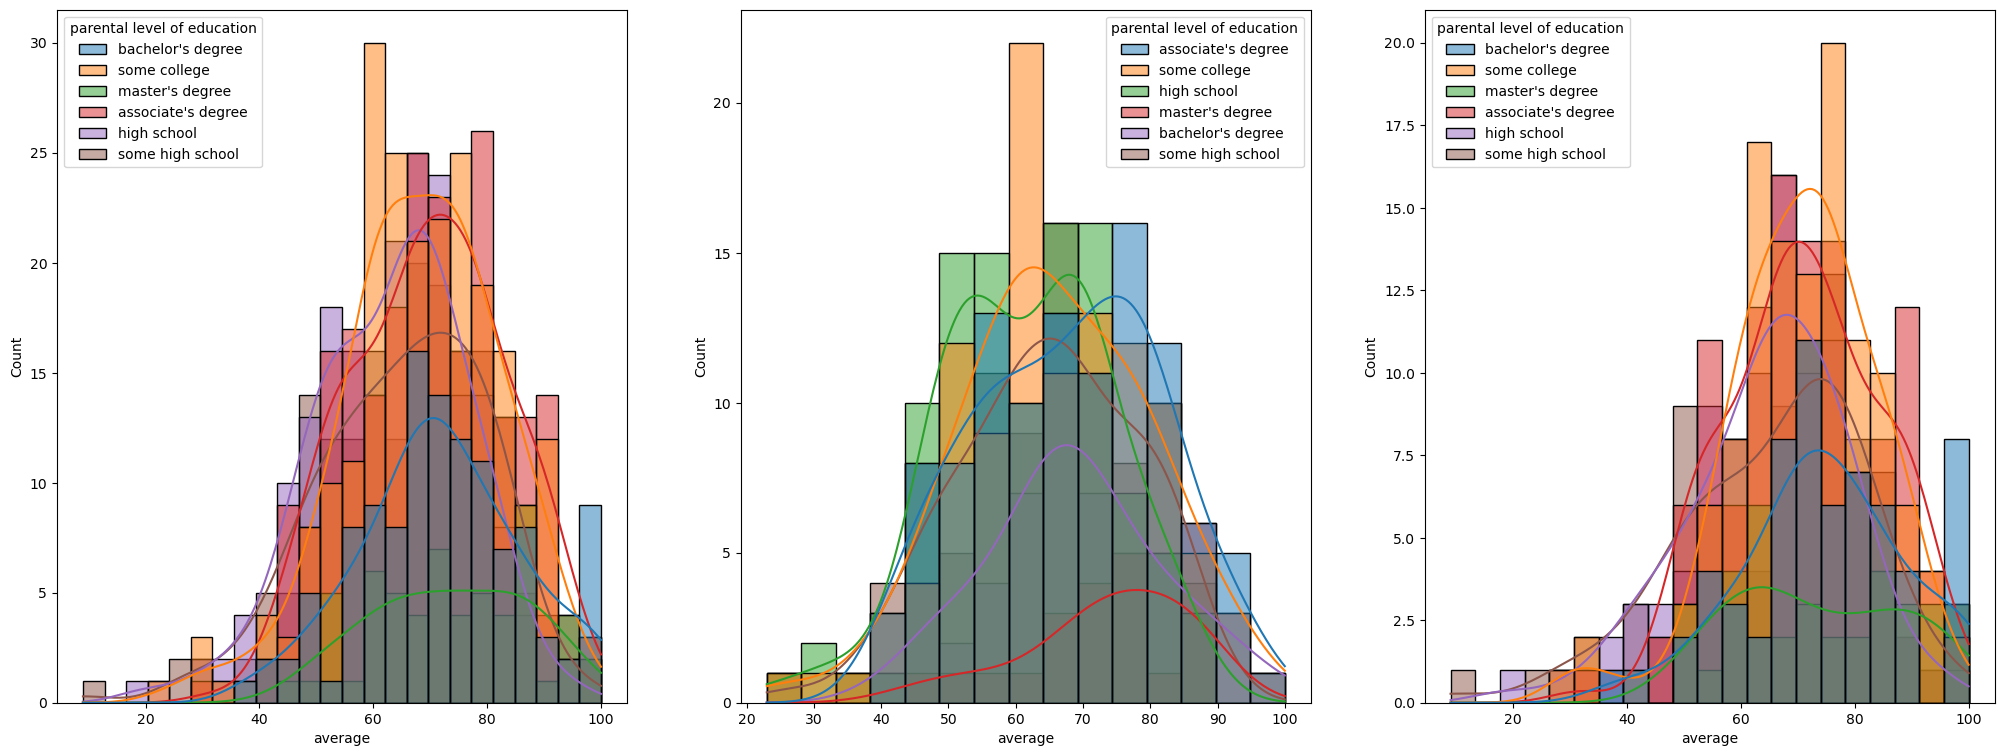

In [43]:
plt.subplots(1,3,figsize=(25,9))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

#### Insights

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

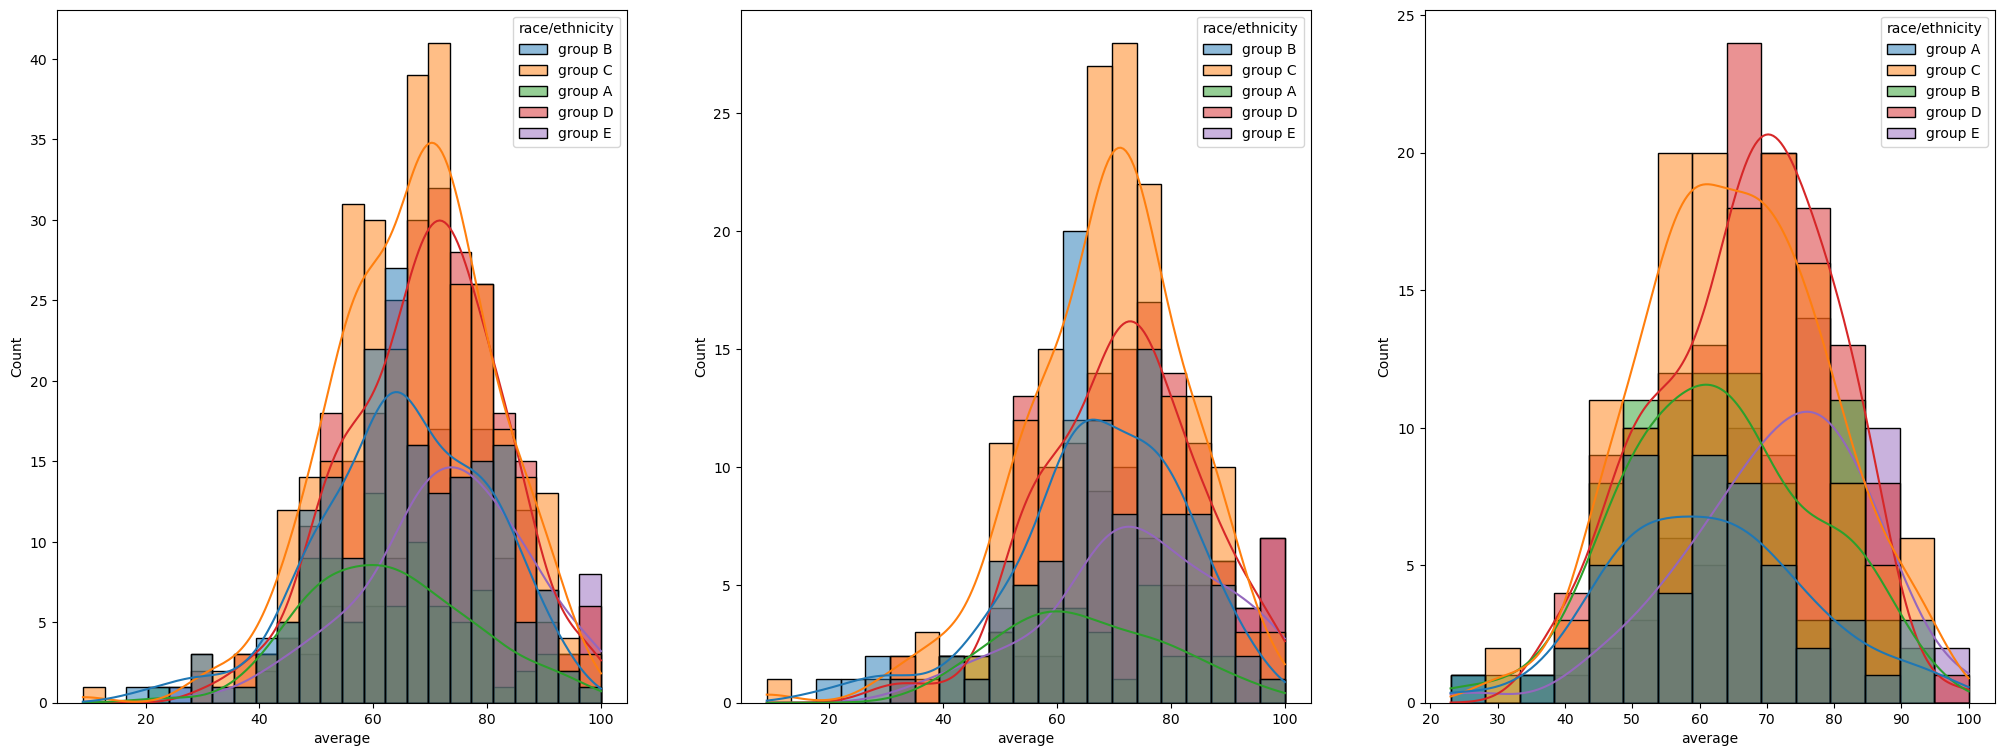

In [45]:
plt.subplots(1,3,figsize=(25,9))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#### Insights

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximum score of students in all three subjects

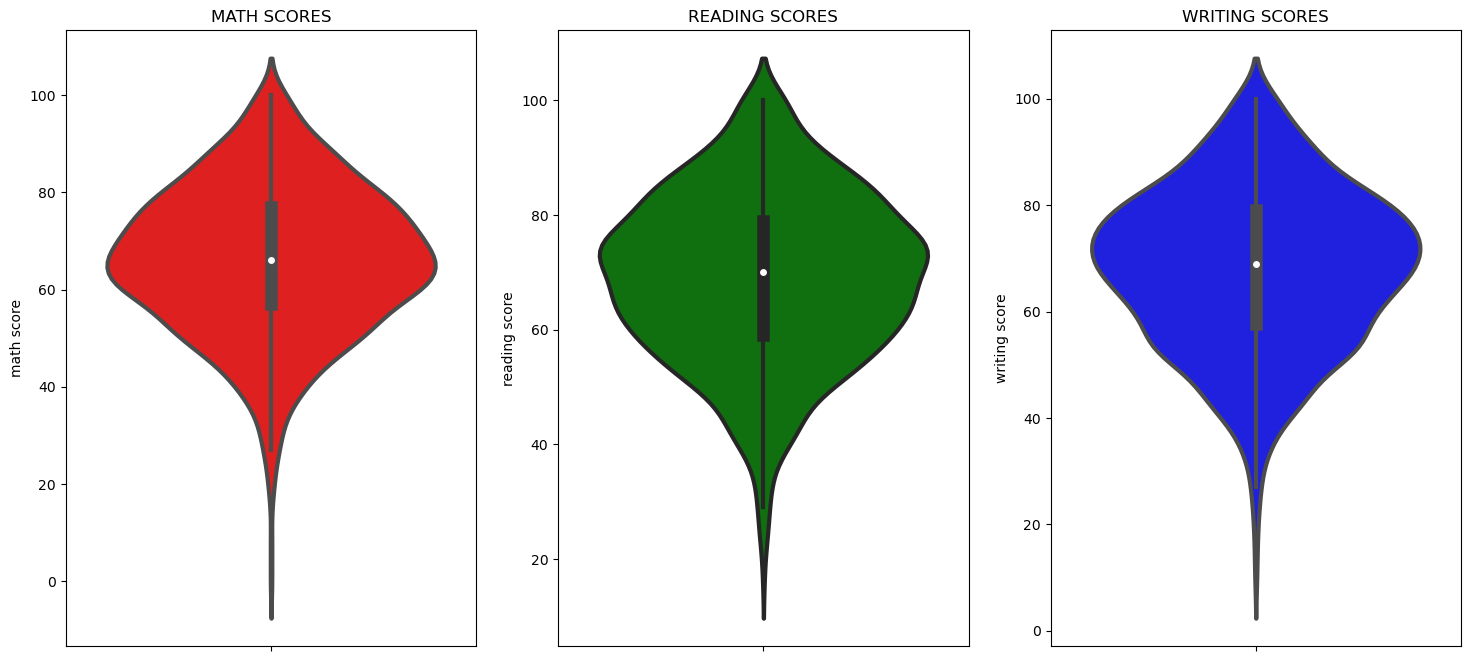

In [48]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Feature Wise Visualization

#### 4.3.1 GENDER COLUMN

How is distribution of Gender ?

Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

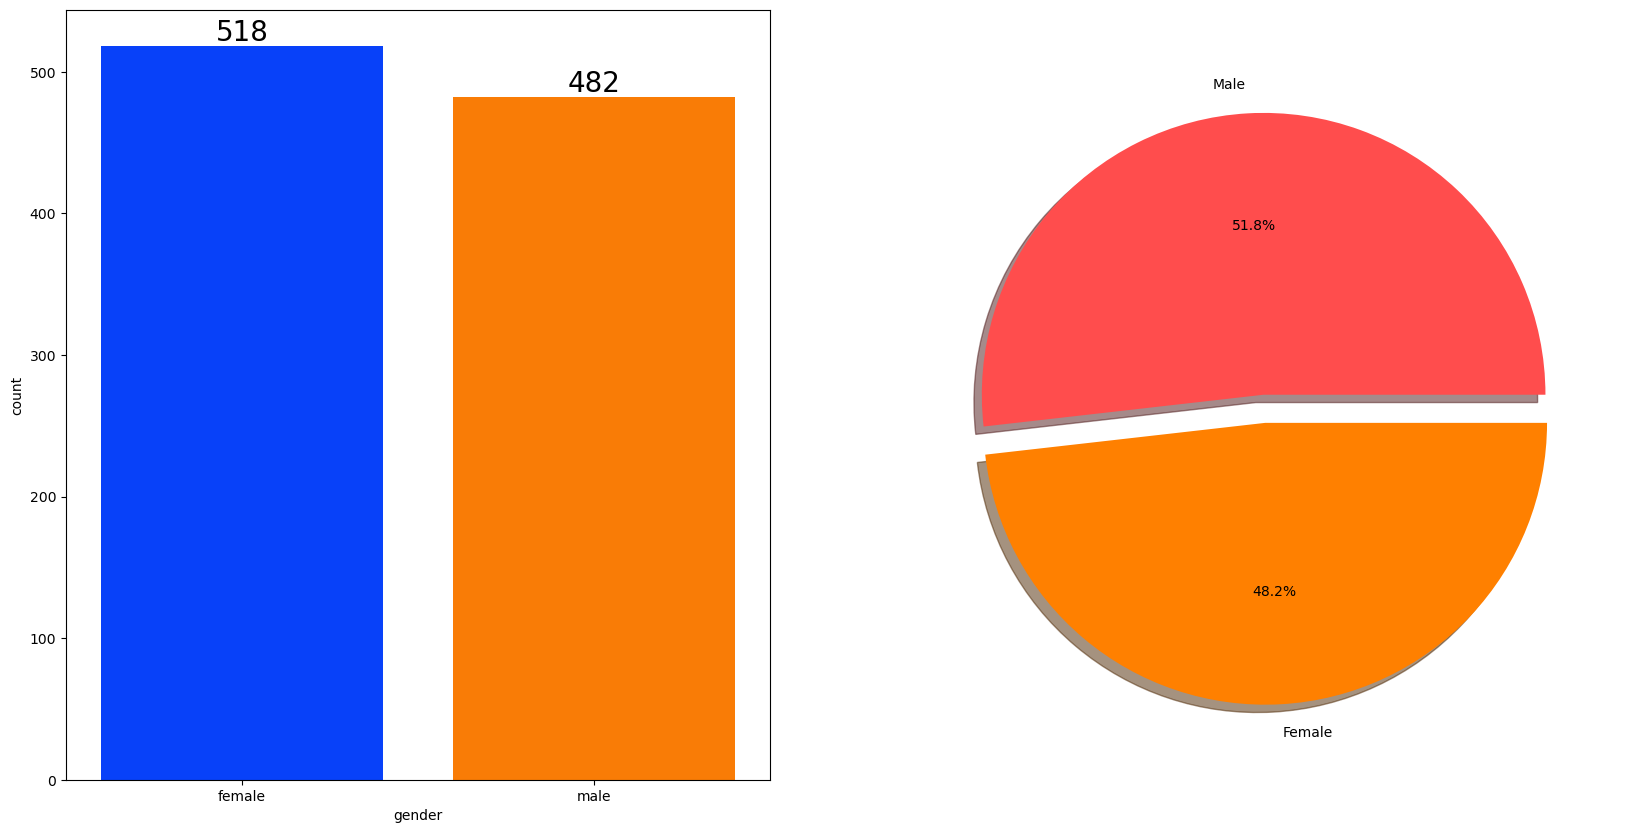

In [53]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

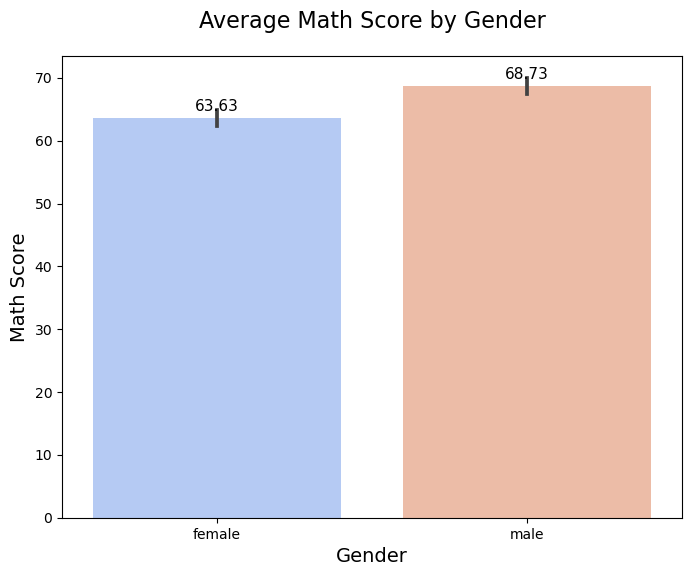

In [57]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df['gender'], y=df['math score'], palette='coolwarm')

# Add numbers above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=11, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

# Set plot title and labels
ax.set_title('Average Math Score by Gender', fontsize=16, pad=20)
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Math Score', fontsize=14)

# Display the plot
plt.show()

#### 4.3.2 RACE/EHNICITY COLUMN

How is Group wise distribution ?

Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

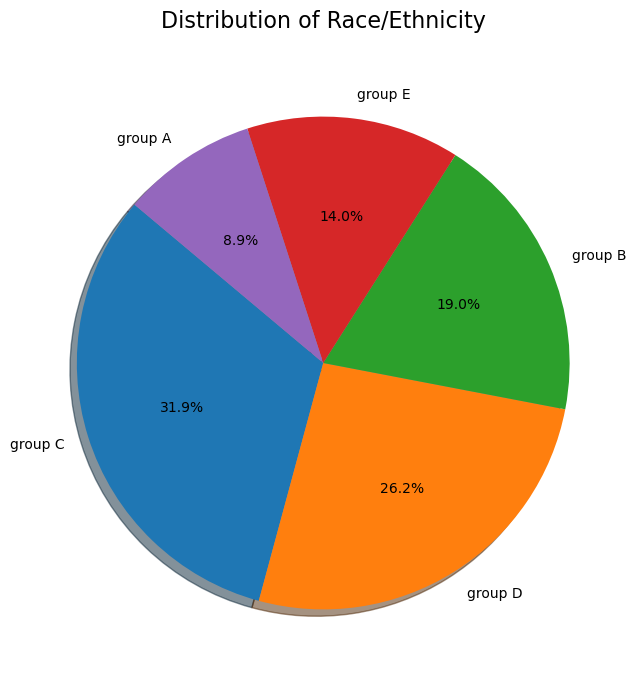

In [60]:
plt.figure(figsize=(8, 8))
plt.pie(df['race/ethnicity'].value_counts(),
        labels=df['race/ethnicity'].value_counts().index,
        autopct='%1.1f%%',  # Display percentages with one decimal place
        startangle=140,  # Start angle for a better layout
        shadow=True)  # Add a shadow for depth

# Set title for the chart
plt.title('Distribution of Race/Ethnicity', fontsize=16, pad=20)

# Display the plot
plt.show()

#### Insights:

Lowest number of students belong to group A

Most of the students belong to the group C and group D

#### BIVARIATE ANALYSIS (Is Race/Ehnicity has any impact on student's performance ?)

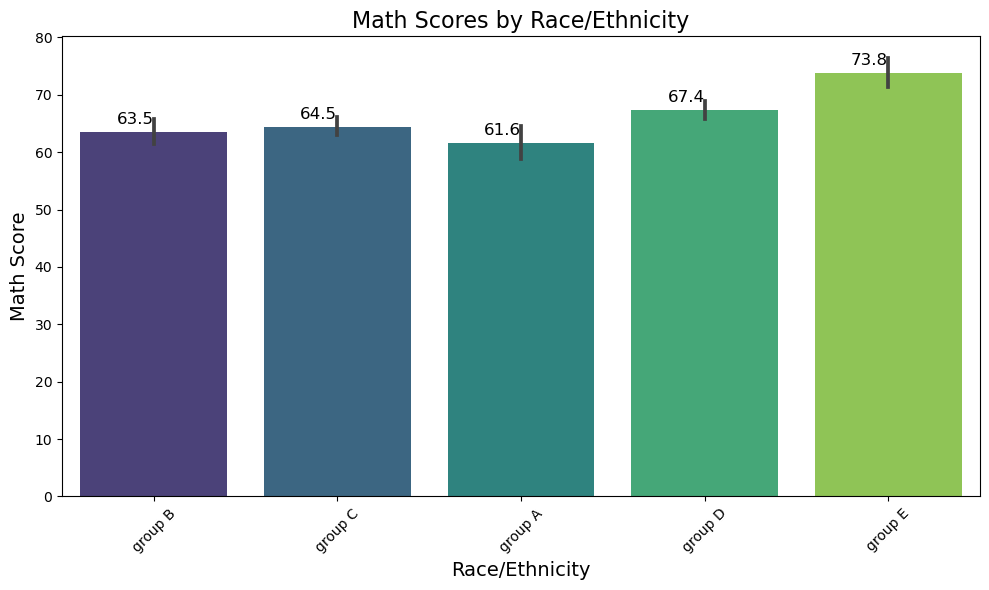

In [63]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df['race/ethnicity'], y=df['math score'], palette='viridis')

# Add labels and title
ax.set_xlabel('Race/Ethnicity', fontsize=14)
ax.set_ylabel('Math Score', fontsize=14)
ax.set_title('Math Scores by Race/Ethnicity', fontsize=16)

# Add data labels on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'right', va = 'center',
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights:

Group E students have scored the highest marks.
    
Group A students have scored the lowest marks.

#### 4.3.3 PARENTAL LEVEL OF EDUCATION COLUMN:

What is educational background of student's parent ?

Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

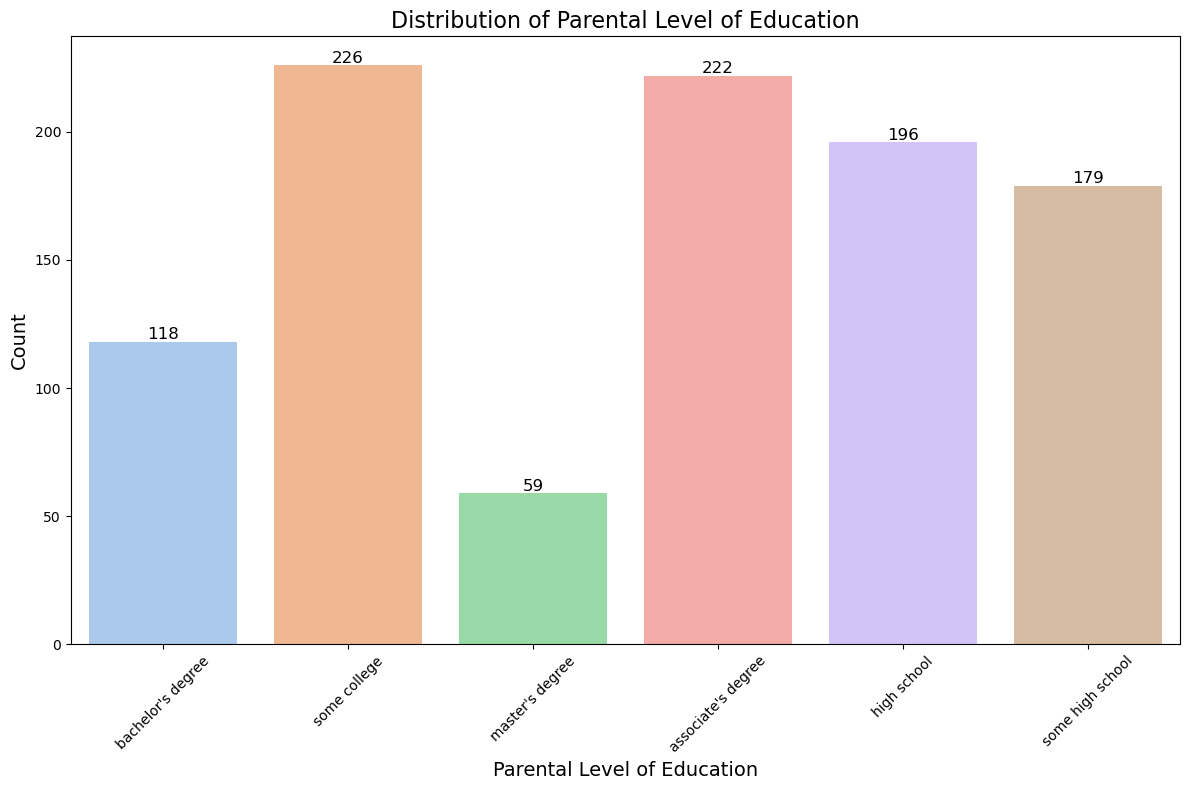

In [67]:
# Create the countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df['parental level of education'], palette='pastel')

# Add labels and title
ax.set_xlabel('Parental Level of Education', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Parental Level of Education', fontsize=16)

# Add data labels on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights:

Least number of parents have acquired a master's degree.

Most of the parents have gone to some college or acquired some associate's degree.

#### BIVARIATE ANALYSIS (Is parental education has any impact on student's performance?)

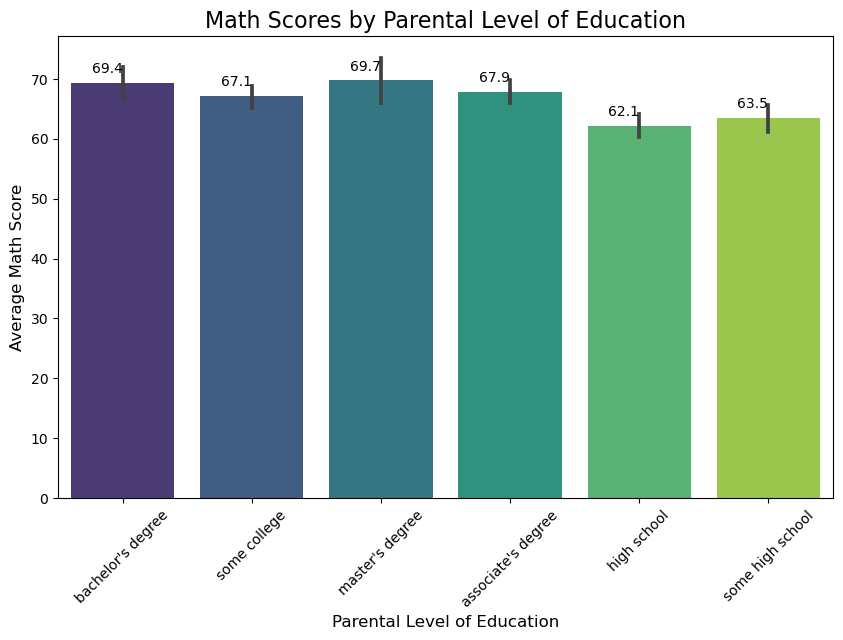

In [70]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='parental level of education', y='math score', data=df, palette='viridis')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add the data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='right', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=10, color='black')

# Set the title and labels
plt.title('Math Scores by Parental Level of Education', fontsize=16)
plt.xlabel('Parental Level of Education', fontsize=12)
plt.ylabel('Average Math Score', fontsize=12)

# Show the plot
plt.show()

#### Insights:

Students with their parents having master's degree or bachelor's degree are having high math score on an average.

#### 4.3.4 LUNCH COLUMN

Which type of lunch is most common amoung students ?

What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS (Which type of lunch is most common amoung students?)

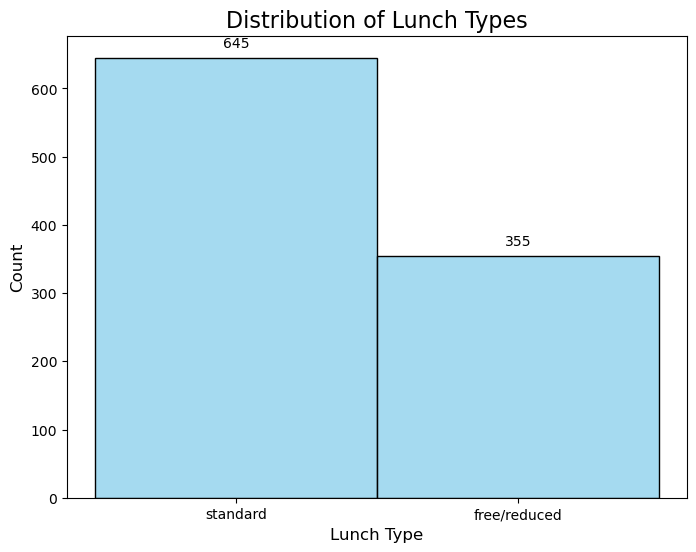

In [74]:
# Create the histogram plot
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df['lunch'], kde=False, color='skyblue')

# Add the data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=10, color='black')

# Set the title and labels
plt.title('Distribution of Lunch Types', fontsize=16)
plt.xlabel('Lunch Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

#### Insights:

Most common type of lunch among the students is standard type lunch.

#### BIVARIATE ANALYSIS (What is the effect of lunch type on test results?)

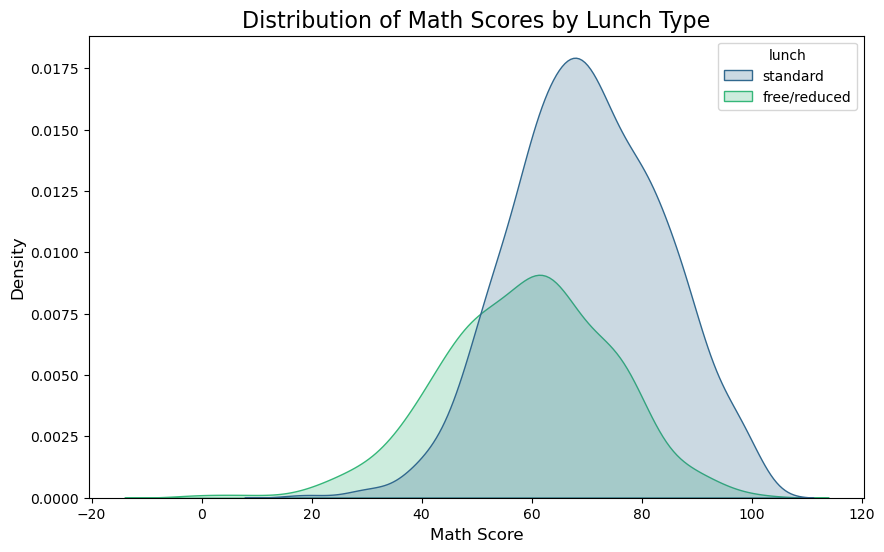

In [77]:
# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='math score', hue='lunch', fill=True, palette='viridis')

# Set the title and labels
plt.title('Distribution of Math Scores by Lunch Type', fontsize=16)
plt.xlabel('Math Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

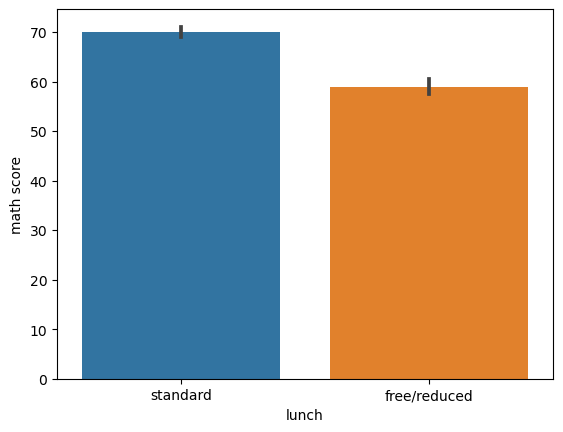

In [78]:
sns.barplot(x=df['lunch'],y=df['math score'])
plt.show()

In [79]:
df.groupby('lunch')['math score'].mean()

lunch
free/reduced    58.921127
standard        70.034109
Name: math score, dtype: float64

#### Insights:

As we can see, most number of students are having standard type of lunch.

Also students having standard lunch are scoring more in math on average (According kdeplot and barplot above).

#### 4.3.5 TEST PREPARATION COURSE COLUMN

Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS (Is Test prepration course has any impact on student's performance ?)

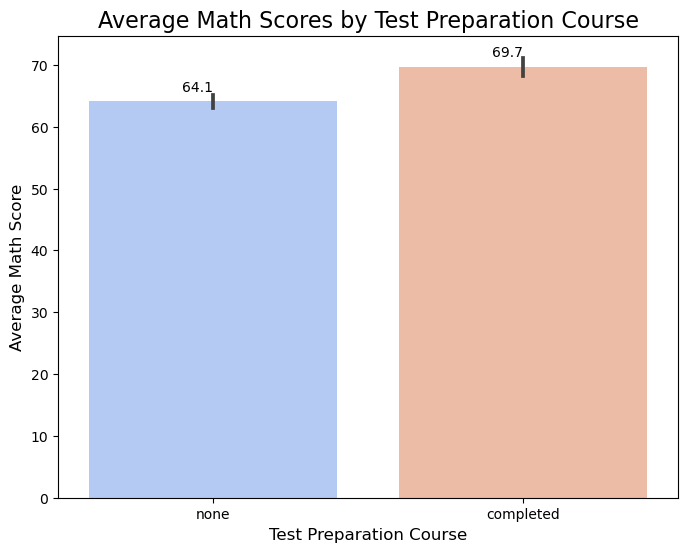

In [83]:
# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='test preparation course', y='math score', data=df, palette='coolwarm')

# Add the data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='right', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=10, color='black')

# Set the title and labels
plt.title('Average Math Scores by Test Preparation Course', fontsize=16)
plt.xlabel('Test Preparation Course', fontsize=12)
plt.ylabel('Average Math Score', fontsize=12)

# Show the plot
plt.show()

#### Insights:

The average math score for students who completed their test preparation course is higher on average.

#### 4.3.6 MUTIVARIATE ANALYSIS USING PAIRPLOT

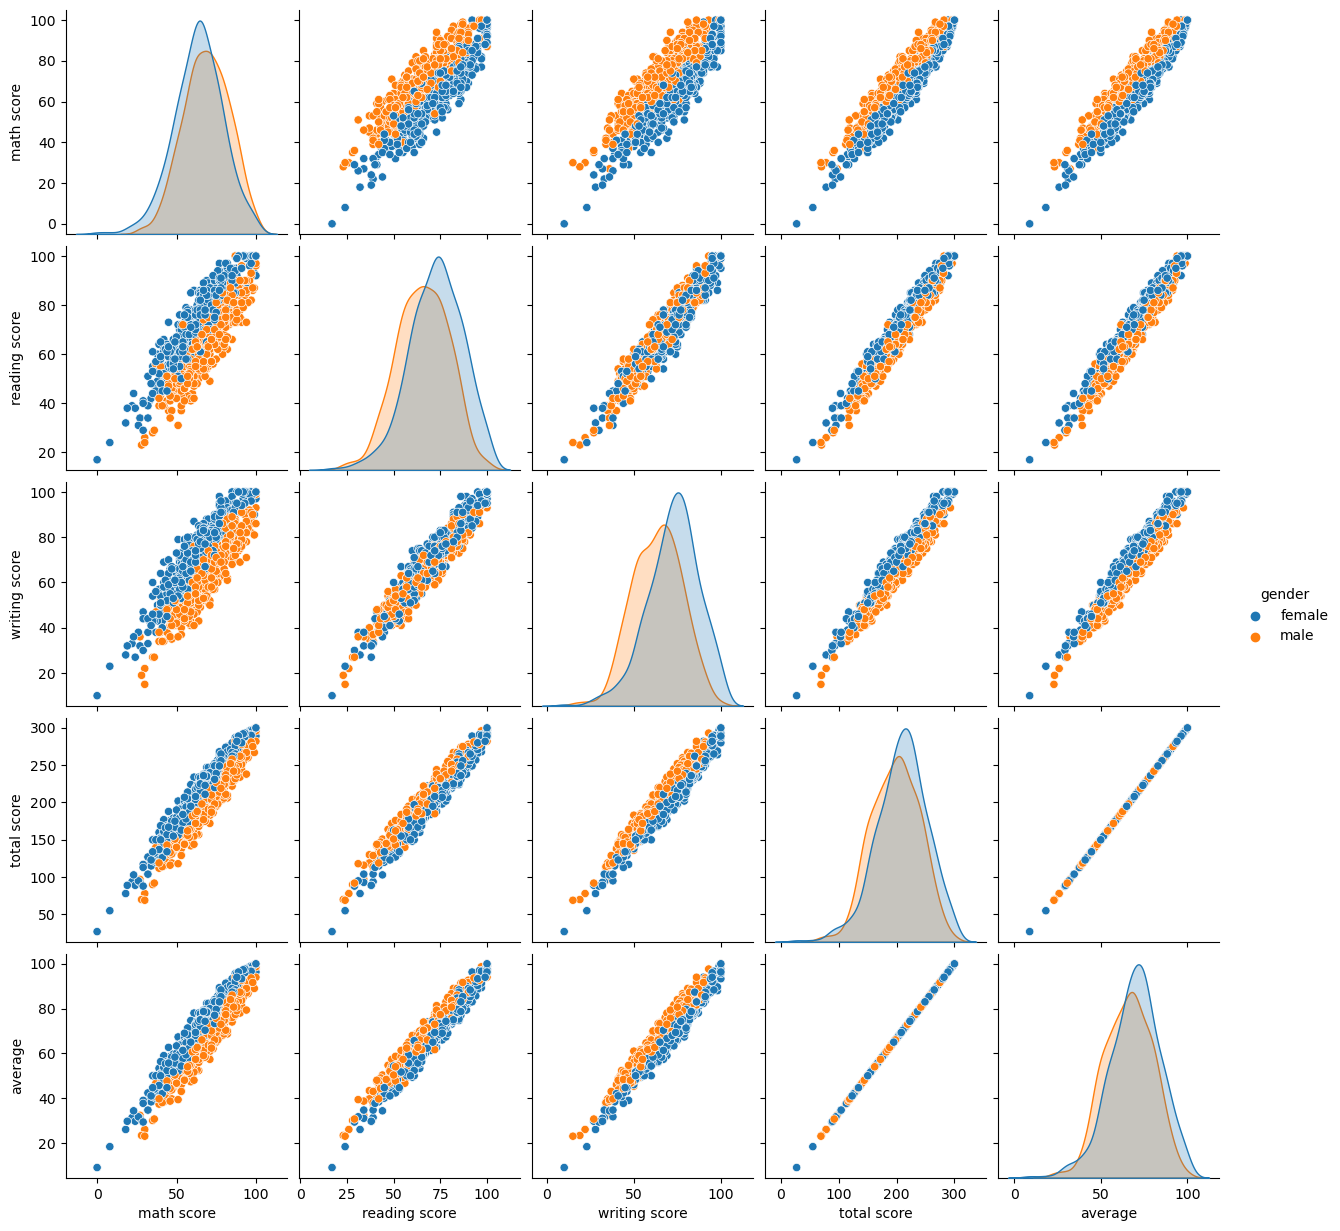

In [86]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights

From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions from EDA

Student's Performance is related with lunch, race, parental level education.

Females lead in pass percentage and also are top-scorers.

Student's Performance is not much related with test preparation course.

Finishing preparation course is benefitial.